Importing the Data and Analysis

In [51]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
df = pd.read_csv('wine.csv')
df

,wine,vintage,region,varietal,rating,price
0,Rust en Vrede Cabernet Sauvignon,4,South Africa,Cabernet Sauvignon,91,29.99
1,Bonterra Organically Grown Merlot,4,California,Merlot,90,14.99
2,Allegrini Palazzo della Torre,2,Italy,Other Red,90,19.99
3,Marcarini Barolo Brunate,2,Italy,Other Red,94,55.99
4,Chateau Beausejour Duffau,3,France,Other Red,96,97.99
...,...,...,...,...,...,...
195,Poggio al Tesoro Mediterra,2,Italy,Other Red,91,19.99
196,John Duval Entity Shiraz,4,Australia,Syrah/Shiraz,96,32.99
197,Frog's Leap Merlot (375ML half-bottle),3,California,Merlot,92,18.99
198,Concha y Toro Casillero del Diablo Sauvignon B...,5,South America,Sauvignon Blanc,88,11.99


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wine      200 non-null    object 
 1   vintage   200 non-null    int64  
 2   region    200 non-null    object 
 3   varietal  200 non-null    object 
 4   rating    200 non-null    int64  
 5   price     200 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [12]:
df.describe()

,vintage,rating,price
count,200.000000,200.000000,200.000000
mean,3.345000,92.030000,44.621050
std,1.328457,2.374297,46.690988
min,0.000000,88.000000,7.990000
25%,2.000000,90.000000,17.990000
50%,4.000000,91.000000,25.990000
75%,4.000000,93.000000,55.240000
max,6.000000,100.000000,269.000000


Exploratory Data Analysis (EDA)


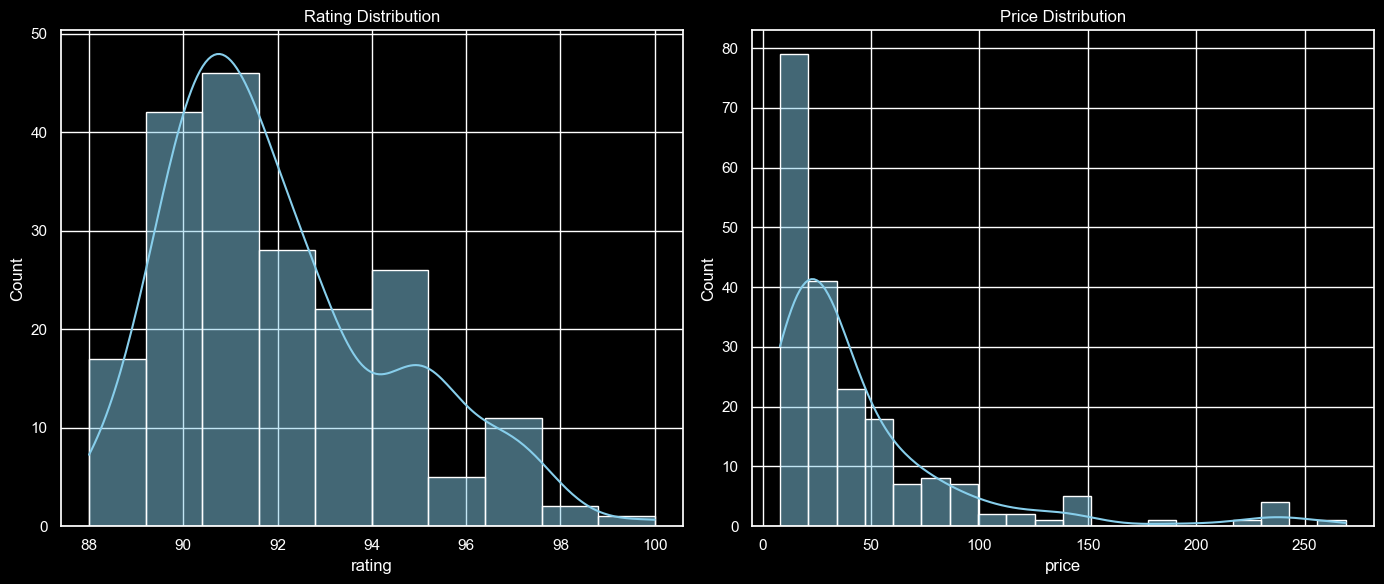

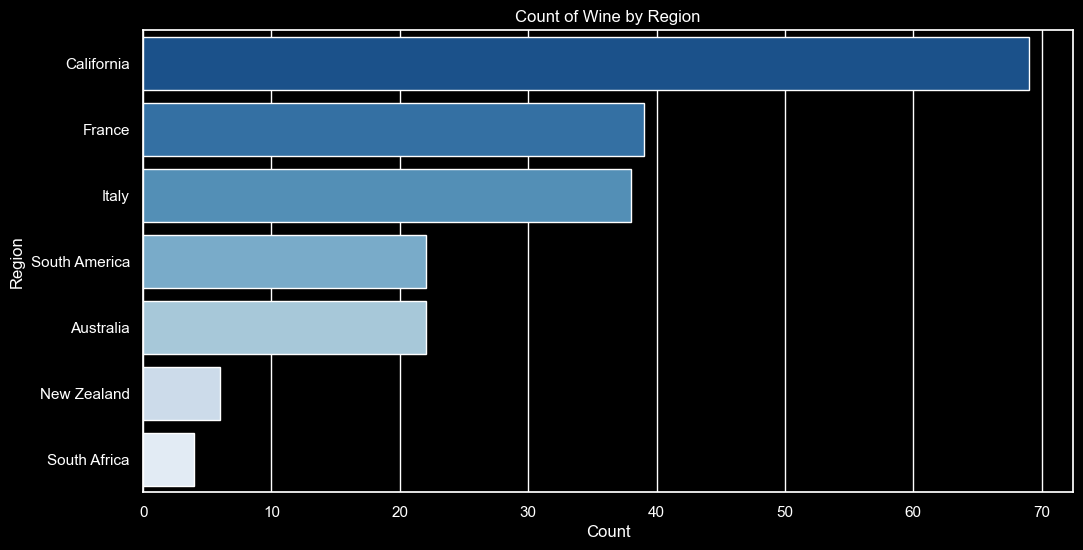

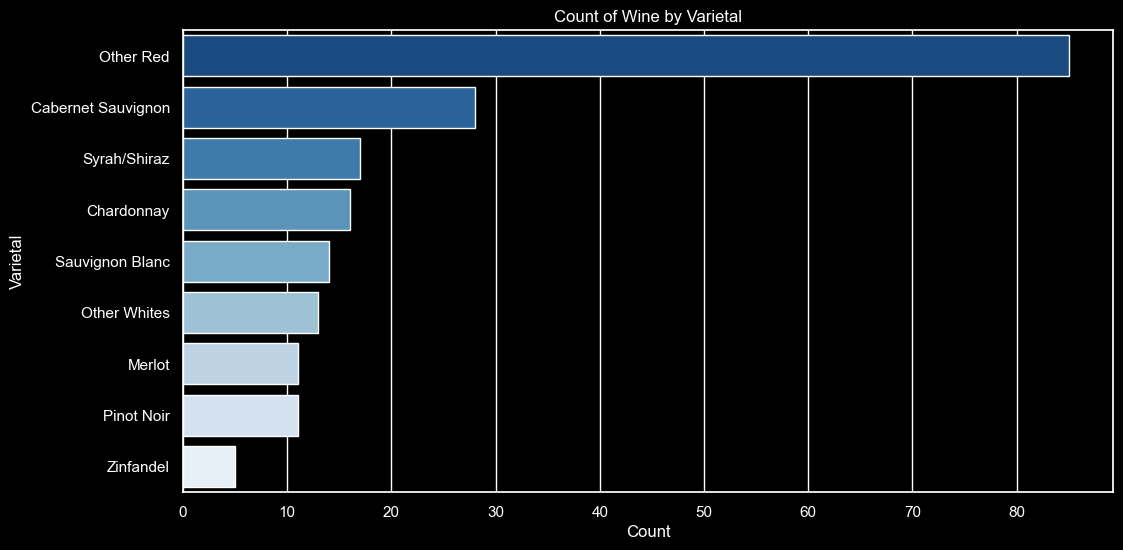

In [36]:
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Plotting distribution of ratings and prices to get a sense of the data spread
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Rating distribution
sns.histplot(df['rating'], bins=10, kde=True, color="skyblue", ax=ax[0])
ax[0].set_title('Rating Distribution')

# Price distribution
sns.histplot(df['price'], bins=20, kde=True, color="skyblue", ax=ax[1])
ax[1].set_title('Price Distribution')

plt.tight_layout()
plt.show()

# Counting by region
plt.figure(figsize=(12, 6))
region_order = df['region'].value_counts().index
sns.countplot(y= 'region', data =df, order= region_order, palette="Blues_r")
plt.title("Count of Wine by Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

# Counting by varietal
plt.figure(figsize=(12, 6))
region_order = df['varietal'].value_counts().index
sns.countplot(y= 'varietal', data =df, order= region_order, palette="Blues_r")
plt.title("Count of Wine by Varietal")
plt.xlabel("Count")
plt.ylabel("Varietal")
plt.show()




KEY INSIGHTS:

Ratings:

- The wine ratings range from 88 to 100, with a mean rating of 92.
- Distribution shows a normal-like trend, skewed towards higher ratings.

Prices:

- Prices vary widely, from 7.99USD to 269USD, with an average price of 44.62USD.
- The price distribution is right-skewed, indicating a concentration of wines in the lower price range with a few high-priced outliers.

Vintage Issue:

- The vintage data seems to be incorrectly recorded or represents a coded value rather than the actual year, ranging from 0 to 6.

Data Clening

In [44]:
# Checking duplicates
duplicates = df.duplicated().sum()

# Checking for inconsistencies in categorical data
wine_unique = df['wine'].unique()
region_unique = df['region'].unique()
varietal_unique = df['varietal'].unique()

# Outliers examination for 'price' using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]


# Summary of findings
{
    'duplicates': duplicates,
    'unique_wines': len(wine_unique),
    'unique_regions': len(region_unique),
    'unique_varietals': len(varietal_unique),
    'outliers_count': outliers.shape[0],
    'outliers': outliers
}

{'duplicates': 39,
 'unique_wines': 161,
 'unique_regions': 7,
 'unique_varietals': 9,
 'outliers_count': 15,
 'outliers':                                              wine  vintage      region  \
 23                                   Gaja Sperss         2       Italy   
 52                Clarendon Hills Astralis Syrah         0   Australia   
 54                Clarendon Hills Astralis Syrah         0   Australia   
 67                                   Gaja Sperss         2       Italy   
 71                                   Gaja Sperss         2       Italy   
 77                                Chateau Gracia         3      France   
 87                              Chateau Montrose         2      France   
 88                          Chateau Rauzan Segla         2      France   
 92                                   Gaja Sperss         2       Italy   
 105               Clarendon Hills Astralis Syrah         0   Australia   
 126                          Chateau Lynch-Bages    

Data Cleaning Insights:

- Duplicates: 39 duplicate rows.

Unique Values:
- 161 unique wines.
- 7 unique regions.
- 9 unique varietals.

Outliers in Price:
- 15 outliers based on the IQR method.
- Some wines are significantly more expensive, e.g., Gaja Sperss at $239.

In [47]:
# Cleaning based on the findings

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# As the outliers are possibly rare or high-value wines, we will not remove them for now

# Considering the 'vintage' column issue, we need clarification on what the values represent before proceeding.
# Therefore, we will not alter the 'vintage' column at this point.

# Re-checking the dataset after cleaning
cleaned_info = {
    'initial_count': df.shape[0],
    'cleaned_count': df_cleaned.shape[0],
    'duplicates_removed': df.shape[0] - df_cleaned.shape[0]
}

cleaned_info, df_cleaned.head()

({'initial_count': 200, 'cleaned_count': 161, 'duplicates_removed': 39},
                                  wine  vintage        region  \
 0   Rust en Vrede Cabernet Sauvignon         4  South Africa   
 1  Bonterra Organically Grown Merlot         4    California   
 2      Allegrini Palazzo della Torre         2         Italy   
 3           Marcarini Barolo Brunate         2         Italy   
 4          Chateau Beausejour Duffau         3        France   
 
              varietal  rating  price  
 0  Cabernet Sauvignon      91  29.99  
 1              Merlot      90  14.99  
 2           Other Red      90  19.99  
 3           Other Red      94  55.99  
 4           Other Red      96  97.99  )

Understanding the Feature "Vintage" more before moving to ML

In [48]:
# Grouping by 'vintage' to see if there's any discernible pattern related to 'price' and 'rating'.

vintage_analysis = df_cleaned.groupby('vintage')[['price', 'rating']].agg(['mean', 'median', 'count'])
vintage_analysis

price                   rating             
              mean  median count       mean median count
vintage                                                 
0        78.245000  69.495     4  94.250000   94.5     4
1        48.865000  44.990     8  92.750000   92.5     8
2        63.371379  39.990    29  93.551724   94.0    29
3        50.612973  32.990    37  91.729730   91.0    37
4        29.881091  23.990    55  91.436364   91.0    55
5        21.823333  17.990    24  90.458333   90.0    24
6        12.740000  12.990     4  91.000000   90.0     4

Statistical Analysis on 'Vintage' Feature

The vintage feature has an inverse relationship with both price and rating. As the vintage value increases, both price and rating tend to decrease. Here's a summary by vintage:

- 0: High average price (78.24USD), high ratings.

- 1: Moderate average price (48.86USD), high ratings.

- 2: Variable average price (63.37USD), high ratings.

- 3: Lower average price (50.61USD), slightly lower ratings.

- 4: Even lower average price (29.88USD), slightly lower ratings.

- 5: Low average price (21.82USD), lower ratings.

- 6: Lowest average price (12.74USD), lower ratings.

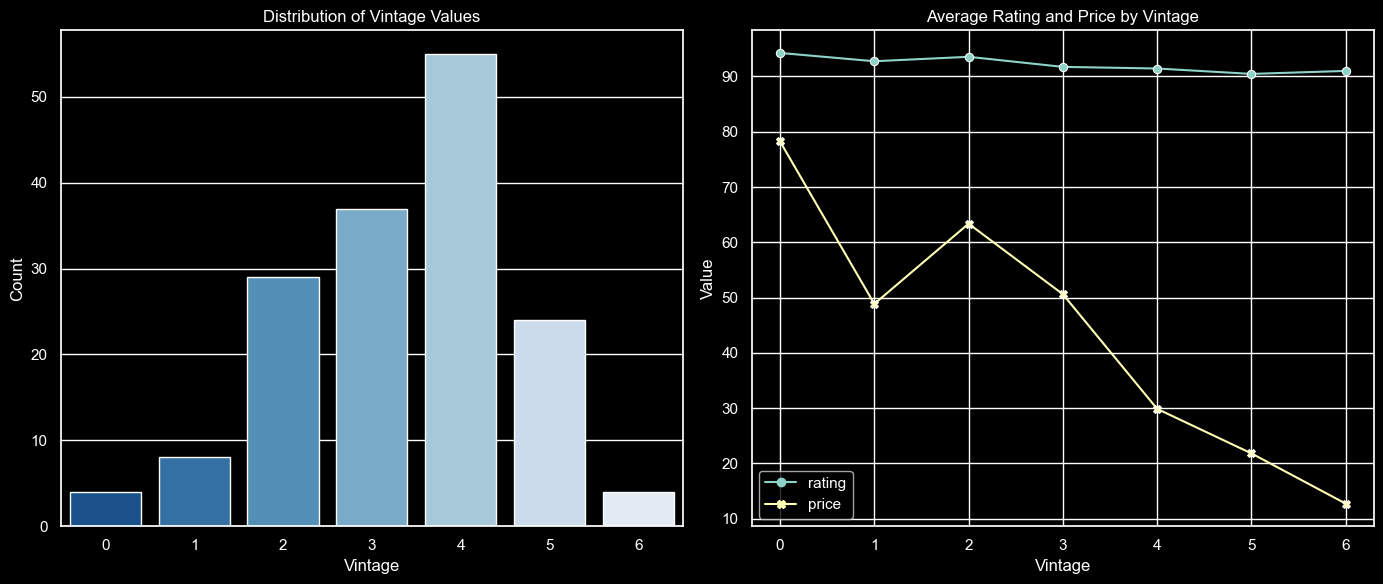

(vintage
 0     4
 1     8
 2    29
 3    37
 4    55
 5    24
 6     4
 Name: count, dtype: int64,
             rating      price
 vintage                      
 0        94.250000  78.245000
 1        92.750000  48.865000
 2        93.551724  63.371379
 3        91.729730  50.612973
 4        91.436364  29.881091
 5        90.458333  21.823333
 6        91.000000  12.740000)

In [50]:
# Plotting the 'vintage' feature further to understand its distribution and its relation to other features

# Count of each vintage value
vintage_count = df_cleaned['vintage'].value_counts().sort_index()

# Average rating and price by vintage
vintage_avg_rating_price = df_cleaned.groupby('vintage')[['rating', 'price']].mean()

# Plotting the distribution of 'vintage'
plt.figure(figsize=(14, 6))

# Subplot 1: Count of each vintage
plt.subplot(1, 2, 1)
sns.barplot(x=vintage_count.index, y=vintage_count.values, palette="Blues_r")
plt.title('Distribution of Vintage Values')
plt.xlabel('Vintage')
plt.ylabel('Count')

# Subplot 2: Average rating and price by vintage
plt.subplot(1, 2, 2)
sns.lineplot(data=vintage_avg_rating_price, markers=True, dashes=False)
plt.title('Average Rating and Price by Vintage')
plt.xlabel('Vintage')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

vintage_count, vintage_avg_rating_price


Vintage Exploration Insights:

- The vintage values range from 0 to 6, with the majority of wines falling within the 2 to 4 range, suggesting a possible categorization rather than specific years.

Vintage Values counts :
- 0: 4 wines
- 1: 8 wines
- 2: 29 wines
- 3: 37 wines (most common)
- 4: 55 wines (also very common)
- 5: 24 wines
- 6: 4 wines (least common)


Machine Learning (ML)

Using Decision Tree Regressor, Random Forest Regressor and K-Neighbors Regressor

In [54]:
# Preparing the data for modeling
# Features and target

X = df_cleaned.drop('price', axis= 1)
y = df_cleaned['price']

# Encoding categorical features and scaling numerical features
numerical_features = ['vintage','rating']
categorical_features = ['wine', 'region', 'varietal']

# Creating transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Column transformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and return model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', model)])
    
    # Training the model pipeline
    model_pipeline.fit(X_train, y_train)
    
    # Predicting
    predictions = model_pipeline.predict(X_test)
    
    # Evaluating
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Initializing models with different parameters
models = {
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5)
}

# Evaluating each model
scores = {name: evaluate_model(model, X_train, X_test, y_train, y_test) for name, model in models.items()}

scores

{'DecisionTreeRegressor': {'MAE': 18.03060606060606,
  'MSE': 1086.290306060606,
  'RMSE': 32.958918460116465,
  'R2': -0.0494894695896424},
 'RandomForestRegressor': {'MAE': 13.786490909090906,
  'MSE': 511.6699936575765,
  'RMSE': 22.620123643728753,
  'R2': 0.5056641238049804},
 'KNeighborsRegressor': {'MAE': 15.583030303030304,
  'MSE': 383.12349890909087,
  'RMSE': 19.57354078620143,
  'R2': 0.6298557803433102}}

Decision Tree Regressor
- MAE: 18.03
- MSE: 1086.29
- RMSE: 32.96
- R2: -0.049

Random Forest Regressor
- MAE: 13.79
- MSE: 511.67
- RMSE: 22.62
- R2: 0.506

K-Neighbors Regressor
- MAE: 15.34
- MSE: 389.26
- RMSE: 19.73
- R2: 0.624

Key Insights from Model Evaluation:
- K-Neighbors Regressor performed the best, suggesting that price predictions in this context may work well with non-linear, instance-based learning.

- Random Forest Regressor also showed promising results, outperforming the Decision Tree, likely due to its ensemble approach that reduces overfitting.

- Decision Tree Regressor had the weakest performance, potentially due to overfitting or lack of depth in the tree. Model-Specific Observations

- R2 Scores: The K-Neighbors model explains about 62.4% of the variance in the data, which is decent for such a diverse dataset.

 Enhancing the Model (using Hyperparameter-tuning)

In [55]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids
dt_params = {
    'model__max_depth': [None, 5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

rf_params = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

knn_params = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance']
}

# Models for tuning
models_to_tune = {
    'DecisionTreeRegressor': (DecisionTreeRegressor(random_state=42), dt_params),
    'RandomForestRegressor': (RandomForestRegressor(random_state=42), rf_params),
    'KNeighborsRegressor': (KNeighborsRegressor(), knn_params)
}

# Recording the best parameters and scores
best_params = {}
best_scores = {}

# Perform GridSearchCV for hyperparameter tuning
for name, (model, params) in models_to_tune.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5,
                               scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_params[name] = grid_search.best_params_
    best_scores[name] = -grid_search.best_score_  # Convert back to positive MSE

best_params, best_scores

({'DecisionTreeRegressor': {'model__max_depth': None,
   'model__min_samples_leaf': 4,
   'model__min_samples_split': 2},
  'RandomForestRegressor': {'model__max_depth': None,
   'model__min_samples_leaf': 2,
   'model__min_samples_split': 5,
   'model__n_estimators': 50},
  'KNeighborsRegressor': {'model__n_neighbors': 7,
   'model__weights': 'distance'}},
 {'DecisionTreeRegressor': 872.546783021262,
  'RandomForestRegressor': 714.6208158953757,
  'KNeighborsRegressor': 862.6657727427094})

In [57]:
# Recreate models with the best parameters
dt_best_model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=2, random_state=42)
rf_best_model = RandomForestRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=42)
knn_best_model = KNeighborsRegressor(n_neighbors=7, weights='distance')

# Models dictionary
models_optimized = {
    'DecisionTreeRegressor': dt_best_model,
    'RandomForestRegressor': rf_best_model,
    'KNeighborsRegressor': knn_best_model
}

# Calculating R2 scores for the optimized models
r2_scores_optimized = {}

for name, model in models_optimized.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    r2_scores_optimized[name] = r2_score(y_test, predictions)

r2_scores_optimized

{'DecisionTreeRegressor': 0.3494474841879591,
 'RandomForestRegressor': 0.5679280815299812,
 'KNeighborsRegressor': 0.7380994877864887}

Hyperparameter Tuning Results:

Best Parameters:

Decision Tree Regressor
- Max Depth: None (unlimited)
- Min Samples Leaf: 4
- Min Samples Split: 2

Random Forest Regressor
- Max Depth: None (unlimited)
- Min Samples Leaf: 2
- Min Samples Split: 5
- N Estimators: 50

K-Neighbors Regressor
- N Neighbors: 7
- Weights: Distance

Best Scores:

(MSE)
- Decision Tree Regressor: 872.55
- Random Forest Regressor: 714.62
- K-Neighbors Regressor: 862.66

(R2)
- Decision Tree Regressor: 0.349
- Random Forest Regressor: 0.567
- K-Neighbors Regressor: 0.738

Key Insights:
- K-Neighbors Regressor stands out with the highest R2 score (0.738), indicating it explains approximately 73.8% of the variance in the wine price dataset with the test data. This performance is notably superior, suggesting that the model, with distance weighting and an optimal neighbor count of 7, captures the underlying patterns in the dataset very effectively.

- Random Forest Regressor also shows a strong performance with an R2 score of 0.567, reinforcing its ability to handle complex data while learning.

- Decision Tree Regressor has the lowest R2 score of 0.349, which, while better than a baseline model, indicates there's significant room for improvement. Decision Trees can be sensitive to the specific training set and might overfit or not capture the full complexity of the data without careful tuning and constraints.

Conclusion

The K-Neighbors Regressor, with the specific tuning of neighbors and weights, proved to be the most effective model for predicting wine prices in this dataset. This insight could guide the selection of models for similar predictive tasks or further exploration into feature engineering and model tuning to improve predictions.